In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler

# Step 1: Load the data
# Replace this with the actual paths of your datasets
hbl_data = pd.read_csv('/content/HBL.csv')
dataset_2 = pd.read_csv('/content/Interest Rate.csv')
dataset_3 = pd.read_csv('/content/Money Supply M2.csv')
dataset_4 = pd.read_csv('/content/inflation data.csv')

# Display the first few rows of HBL data to understand the structure
print(hbl_data.head())

# Step 2: Handle Missing Data
# Checking for missing values
print(hbl_data.isnull().sum())

# Fill missing values with forward fill or other methods as needed
hbl_data.fillna(method='ffill', inplace=True)

# Step 3: Remove Outliers (optional, depends on the nature of your data)
# You can remove outliers based on Z-score or IQR methods
# Example: Using Z-score to filter out data
from scipy.stats import zscore
hbl_data = hbl_data[(np.abs(zscore(hbl_data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Step 4: Convert date columns to datetime format if necessary
# Example if there’s a date column called 'date'
hbl_data['Date'] = pd.to_datetime(hbl_data['Date'])


# Step 2: Extract the year from the 'Date' column and create a new 'Year' column
hbl_data['Year'] = hbl_data['Date'].dt.year

# Display the first few rows to check if the new 'Year' column is added correctly
print(hbl_data.head())



         Date   Price    Open    High     Low   Vol. Change %
0  12/10/2024  163.45  167.00  168.45  161.44  2.75M   -2.20%
1   12/9/2024  167.12  170.01  171.98  166.24  3.59M   -4.04%
2   12/6/2024  174.16  175.00  177.25  173.05  3.75M   -0.21%
3   12/5/2024  174.52  173.80  176.90  170.87  5.27M    0.43%
4   12/4/2024  173.77  178.16  179.00  172.80  4.62M   -2.51%
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64
        Date   Price    Open    High     Low   Vol. Change %  Year
0 2024-12-10  163.45  167.00  168.45  161.44  2.75M   -2.20%  2024
1 2024-12-09  167.12  170.01  171.98  166.24  3.59M   -4.04%  2024
2 2024-12-06  174.16  175.00  177.25  173.05  3.75M   -0.21%  2024
3 2024-12-05  174.52  173.80  176.90  170.87  5.27M    0.43%  2024
4 2024-12-04  173.77  178.16  179.00  172.80  4.62M   -2.51%  2024


<ipython-input-62-6d4f86eb1a40>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hbl_data.fillna(method='ffill', inplace=True)


In [ ]:
all_data = pd.merge(hbl_data, dataset_2, on='Year', how='inner')
all_data = pd.merge(all_data, dataset_3, on='Year', how='inner')
all_data = pd.merge(all_data, dataset_4, on='Year', how='inner')
all_data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Pakistan's policy interest rate,Unnamed: 2_x,Unnamed: 3_x,Unnamed: 4_x,Money Supply M2,Unnamed: 2_y,Unnamed: 3_y,Unnamed: 4_y,Unnamed: 5,Unnamed: 6,Inflation Rate (%),Annual Change
0,2023-12-29,110.0,111.01,112.00,109.55,1.49M,-1.08%,2023,22.0,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,30.77%,10.89%
1,2023-12-28,111.2,111.26,113.49,110.20,3.34M,1.00%,2023,22.0,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,30.77%,10.89%
2,2023-12-27,110.1,110.50,110.94,107.05,2.96M,0.55%,2023,22.0,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,30.77%,10.89%
3,2023-12-26,109.5,116.00,118.80,107.25,5.38M,-5.19%,2023,22.0,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,30.77%,10.89%
4,2023-12-22,115.5,119.50,121.00,115.00,1.56M,-3.75%,2023,22.0,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,30.77%,10.89%


In [ ]:
# Step 1: Check all column names to understand the structure of your dataset
print(all_data.columns)

# Step 2: Identify and drop unnecessary 'Unnamed' columns
# Drop all columns with names starting with 'Unnamed'
all_data = all_data.loc[:, ~all_data.columns.str.contains('^Unnamed')]

# Step 3: Check for remaining NaN values
print(all_data.isnull().sum())

# Step 4: Decide how to handle NaN values for remaining columns
# Option A: Drop rows with NaN values (if they are not required)
all_data.dropna(inplace=True)

# Option B: Fill NaN values with a default value (e.g., 0 or mean)
# Uncomment the method you'd prefer
# all_data.fillna(0, inplace=True)  # Replace NaN with 0
# all_data.fillna(all_data.mean(), inplace=True)  # Replace NaN with mean

# Step 5: Verify the final dataset
print(all_data.head())
print(all_data.isnull().sum())


Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Year',
       'Pakistan's policy interest rate', 'Unnamed: 2_x', 'Unnamed: 3_x',
       'Unnamed: 4_x', 'Money Supply M2', 'Unnamed: 2_y', 'Unnamed: 3_y',
       'Unnamed: 4_y', 'Unnamed: 5', 'Unnamed: 6', 'Inflation Rate (%)',
       'Annual Change'],
      dtype='object')
Date                               0
Price                              0
Open                               0
High                               0
Low                                0
Vol.                               0
Change %                           0
Year                               0
Pakistan's policy interest rate    0
Money Supply M2                    0
Inflation Rate (%)                 0
Annual Change                      0
dtype: int64
        Date  Price    Open    High     Low   Vol. Change %  Year  \
0 2023-12-29  110.0  111.01  112.00  109.55  1.49M   -1.08%  2023   
1 2023-12-28  111.2  111.26  113.49  110.20  3.34M    1.00%  2

In [ ]:
all_data.head()
all_data.dtypes

,0
Date,datetime64[ns]
Price,float64
Open,float64
High,float64
Low,float64
Vol.,object
Change %,object
Year,int32
Pakistan's policy interest rate,float64
Money Supply M2,float64


In [ ]:
print(all_data.columns)


Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Year',
       'Pakistan's policy interest rate', 'Money Supply M2',
       'Inflation Rate (%)', 'Annual Change'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Inspect column names to identify any issues
print("Before cleaning:", all_data.columns)

# Clean column names: remove extra spaces, special characters, and standardize formatting
all_data.columns = all_data.columns.str.strip()
all_data.columns = all_data.columns.str.replace(r'[()]', '', regex=True)  # Remove parentheses
print("After cleaning:", all_data.columns)

# Convert 'Vol.' column to numeric
def convert_volume(value):
    if isinstance(value, str):
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000  # Convert millions to numeric
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000  # Convert thousands to numeric
    return float(value)

all_data['Vol.'] = all_data['Vol.'].apply(convert_volume)

# Convert percentage-based columns to numeric
if 'Inflation Rate %' in all_data.columns:
    all_data['Inflation Rate %'] = all_data['Inflation Rate %'].str.replace('%', '').astype(float)
else:
    print("'Inflation Rate %' column not found after cleanup.")

if 'Annual Change' in all_data.columns:
    all_data['Annual Change'] = all_data['Annual Change'].str.replace('%', '').astype(float)
else:
    print("'Annual Change' column not found after cleanup.")

if 'Change %' in all_data.columns:
    all_data['Change %'] = all_data['Change %'].str.replace('%', '').astype(float)

# Select columns to scale
columns_to_scale = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %',
                    'Pakistan\'s policy interest rate', 'Money Supply M2',
                    'Inflation Rate %', 'Annual Change']

# Ensure all selected columns exist
for col in columns_to_scale:
    if col not in all_data.columns:
        print(f"Column '{col}' not found in the dataset.")

# Scale the numeric columns
scaler = StandardScaler()

# Check that all columns to scale exist
existing_columns_to_scale = [col for col in columns_to_scale if col in all_data.columns]
all_data[existing_columns_to_scale] = scaler.fit_transform(all_data[existing_columns_to_scale])

# Display the scaled data
print(all_data.head())


Before cleaning: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Year',
       'Pakistan's policy interest rate', 'Money Supply M2',
       'Inflation Rate (%)', 'Annual Change'],
      dtype='object')
After cleaning: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Year',
       'Pakistan's policy interest rate', 'Money Supply M2',
       'Inflation Rate %', 'Annual Change'],
      dtype='object')
        Date     Price      Open      High       Low      Vol.  Change %  \
0 2023-12-29 -0.388949 -0.372378 -0.380091 -0.372007  0.162838 -0.555224   
1 2023-12-28 -0.366871 -0.367773 -0.353010 -0.359889  1.110978  0.496775   
2 2023-12-27 -0.387109 -0.381772 -0.399357 -0.418615  0.916225  0.269179   
3 2023-12-26 -0.398148 -0.280462 -0.256501 -0.414887  2.156495 -2.633934   
4 2023-12-22 -0.287757 -0.215992 -0.216515 -0.270402  0.198714 -1.905627   

   Year  Pakistan's policy interest rate  Money Supply M2  Inflation Rate %  \
0  2023                

In [ ]:

# Step 3: Define a Function to Check Stationarity
def test_stationarity(data, column_name):
    result = adfuller(data[column_name])
    print(f'ADF Statistic for {column_name}: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print(f"The column '{column_name}' is stationary.")
    else:
        print(f"The column '{column_name}' is non-stationary.")

# Step 4: Apply the Stationarity Check to Specific Columns
# Example: Check the 'Price' column for stationarity
print("Checking stationarity for specific columns:")
test_stationarity(all_data, 'Price')  # Replace 'Price' with the actual column name

# Optional: Check all numeric columns for stationarity
print("\nChecking stationarity for all numeric columns:")
for col in all_data.select_dtypes(include=[float, int]).columns:
    test_stationarity(all_data, col)


Checking stationarity for specific columns:
ADF Statistic for Price: -1.6718479770402597
p-value: 0.4456724787582538
The column 'Price' is non-stationary.

Checking stationarity for all numeric columns:
ADF Statistic for Price: -1.6718479770402597
p-value: 0.4456724787582538
The column 'Price' is non-stationary.
ADF Statistic for Open: -1.6525666067766787
p-value: 0.45570220915124143
The column 'Open' is non-stationary.
ADF Statistic for High: -1.7312286949385134
p-value: 0.41509856249759486
The column 'High' is non-stationary.
ADF Statistic for Low: -1.7411436801467952
p-value: 0.4100483180903168
The column 'Low' is non-stationary.
ADF Statistic for Vol.: -4.678805379308584
p-value: 9.221561572479622e-05
The column 'Vol.' is stationary.
ADF Statistic for Change %: -32.52333099943242
p-value: 0.0
The column 'Change %' is stationary.
ADF Statistic for Year: -0.02509680215378692
p-value: 0.9564067294221121
The column 'Year' is non-stationary.
ADF Statistic for Pakistan's policy interest 

Checking stationarity for all numeric columns and transforming non-stationary columns:

Checking column: Price
ADF Statistic for Price: -1.6718479770402597
p-value: 0.4456724787582538
The column 'Price' is non-stationary.
Transforming column: Price


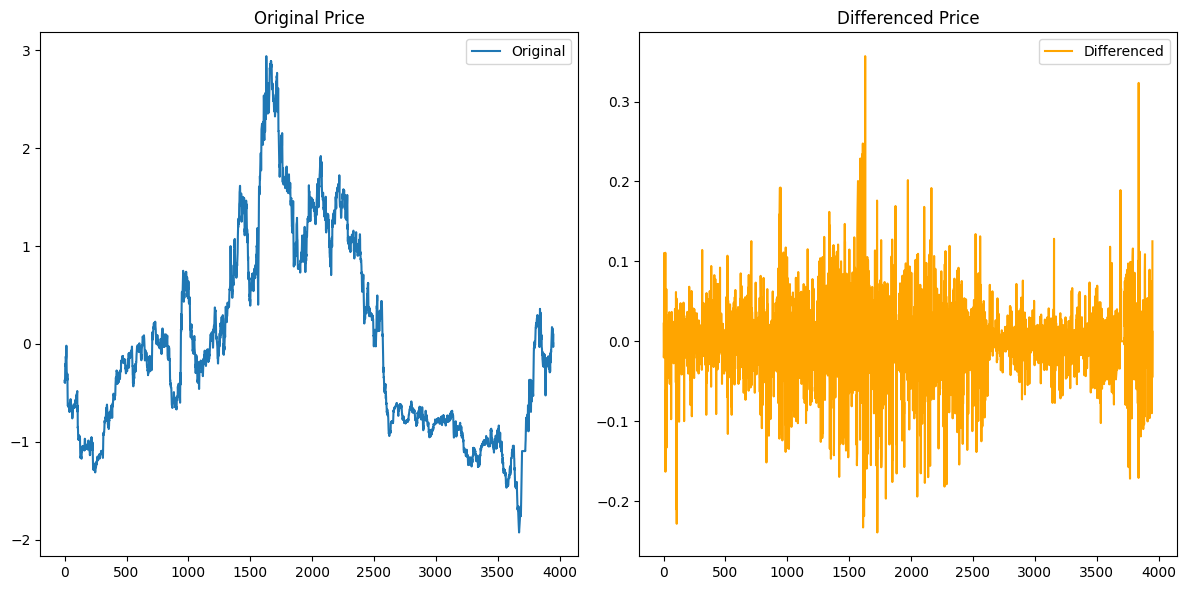


Stationarity test after differencing for Price:
ADF Statistic for Price_diff: -35.859618529236606
p-value: 0.0
The column 'Price_diff' is stationary.

Checking column: Open
ADF Statistic for Open: -1.6525666067766787
p-value: 0.45570220915124143
The column 'Open' is non-stationary.
Transforming column: Open


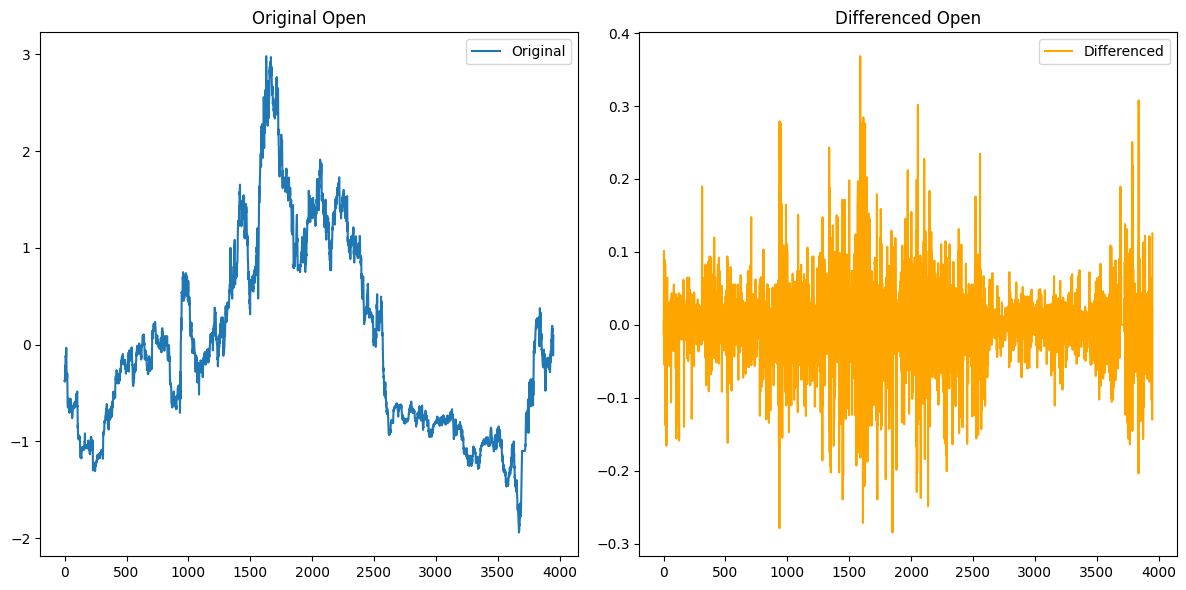


Stationarity test after differencing for Open:
ADF Statistic for Open_diff: -37.68798850490237
p-value: 0.0
The column 'Open_diff' is stationary.

Checking column: High
ADF Statistic for High: -1.7312286949385134
p-value: 0.41509856249759486
The column 'High' is non-stationary.
Transforming column: High


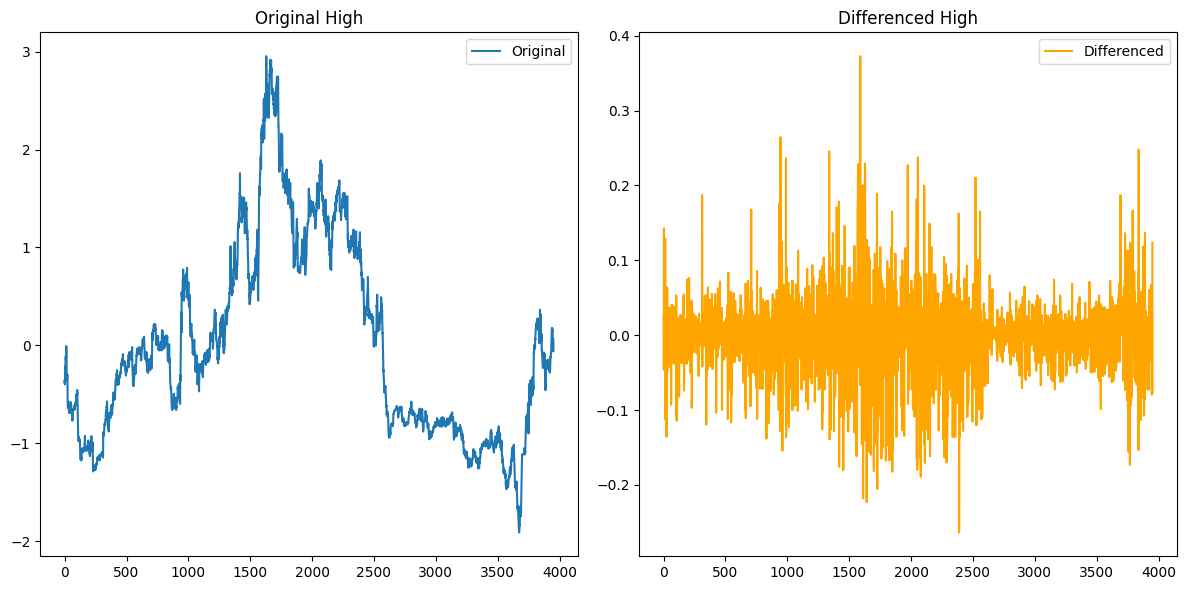


Stationarity test after differencing for High:
ADF Statistic for High_diff: -13.481750013004014
p-value: 3.231147748785469e-25
The column 'High_diff' is stationary.

Checking column: Low
ADF Statistic for Low: -1.7411436801467952
p-value: 0.4100483180903168
The column 'Low' is non-stationary.
Transforming column: Low


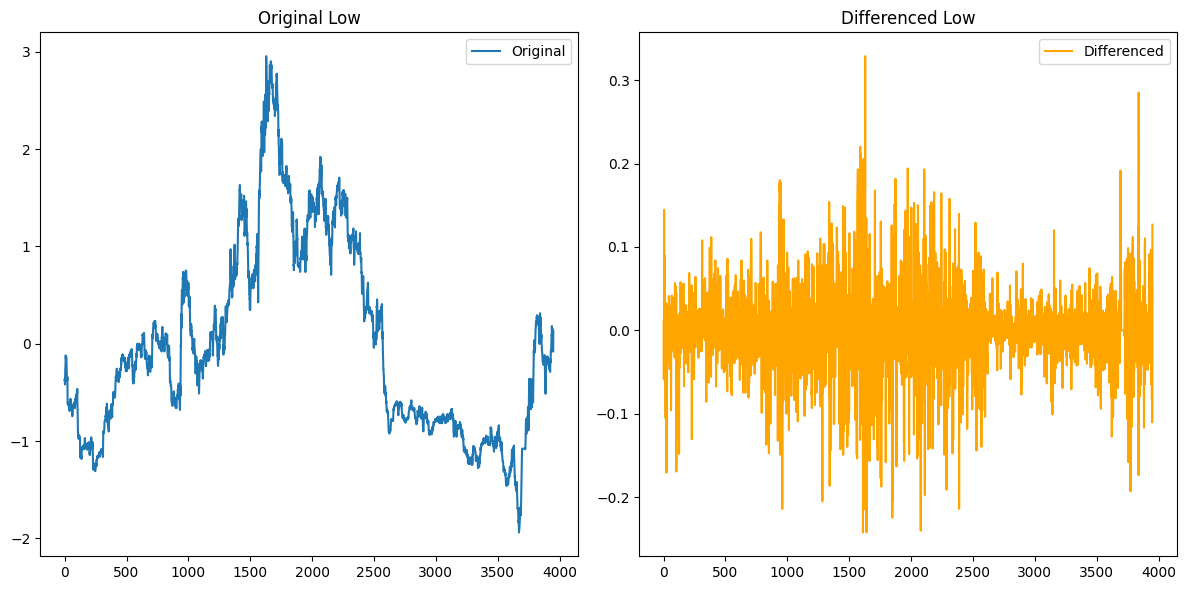


Stationarity test after differencing for Low:
ADF Statistic for Low_diff: -12.510242283728305
p-value: 2.684285506430435e-23
The column 'Low_diff' is stationary.

Checking column: Vol.
ADF Statistic for Vol.: -4.678805379308584
p-value: 9.221561572479622e-05
The column 'Vol.' is stationary.

Checking column: Change %
ADF Statistic for Change %: -32.52333099943242
p-value: 0.0
The column 'Change %' is stationary.

Checking column: Year
ADF Statistic for Year: -0.02509680215378692
p-value: 0.9564067294221121
The column 'Year' is non-stationary.
Transforming column: Year


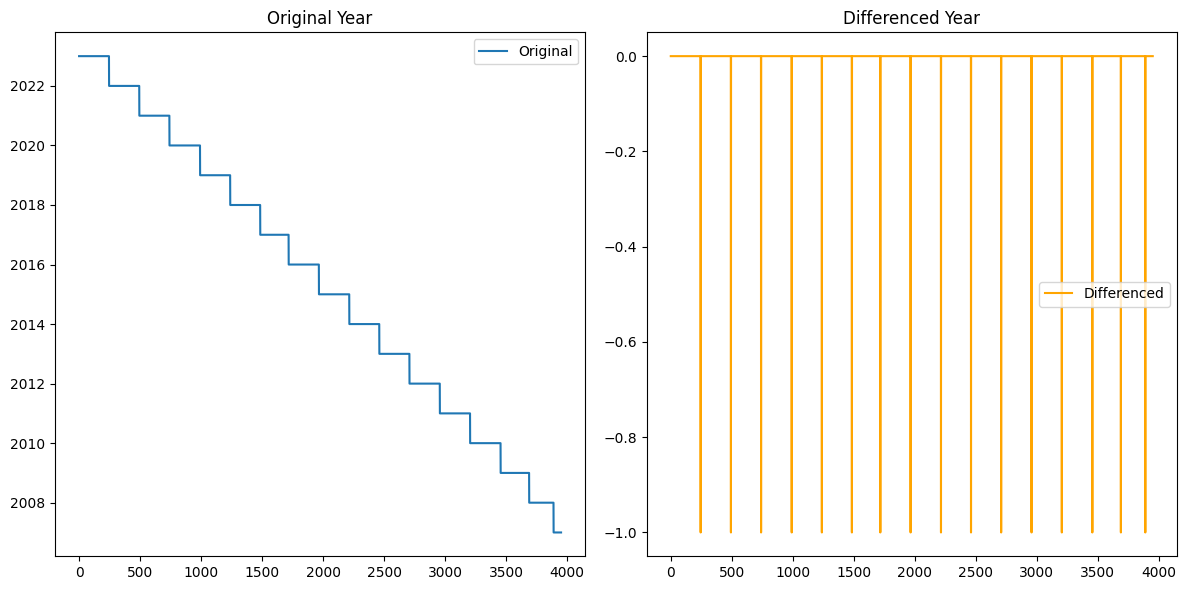


Stationarity test after differencing for Year:
ADF Statistic for Year_diff: -63.08125779916448
p-value: 0.0
The column 'Year_diff' is stationary.

Checking column: Pakistan's policy interest rate
ADF Statistic for Pakistan's policy interest rate: -2.704659057689126
p-value: 0.07323551275052129
The column 'Pakistan's policy interest rate' is non-stationary.
Transforming column: Pakistan's policy interest rate


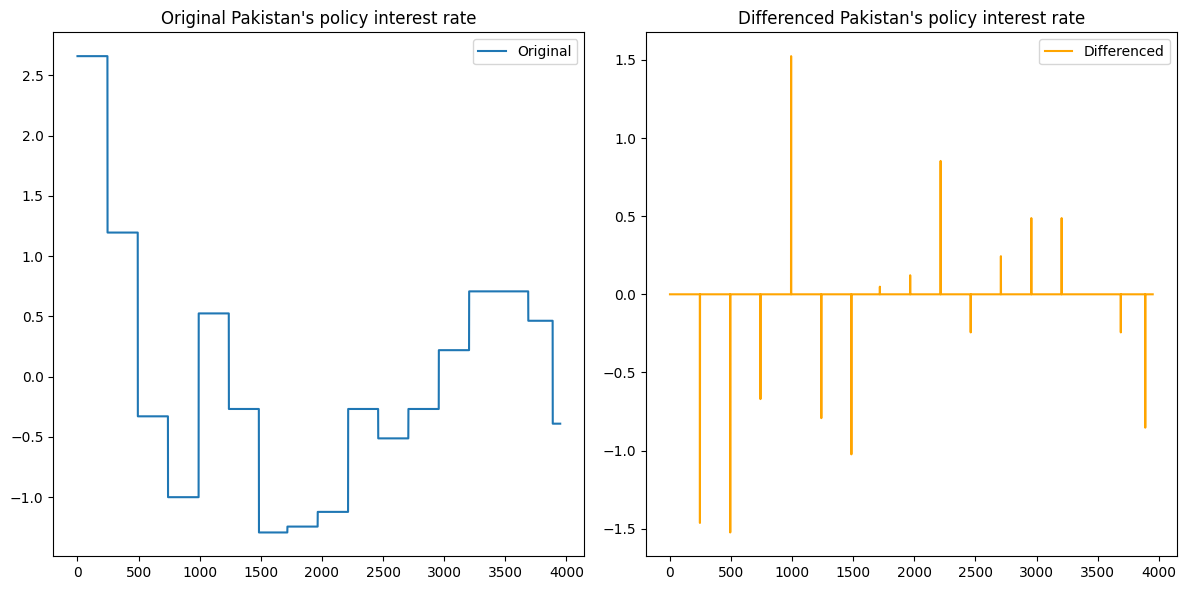


Stationarity test after differencing for Pakistan's policy interest rate:
ADF Statistic for Pakistan's policy interest rate_diff: -62.83854603552734
p-value: 0.0
The column 'Pakistan's policy interest rate_diff' is stationary.

Checking column: Money Supply M2
ADF Statistic for Money Supply M2: -2.4661840025084234
p-value: 0.12392037939491951
The column 'Money Supply M2' is non-stationary.
Transforming column: Money Supply M2


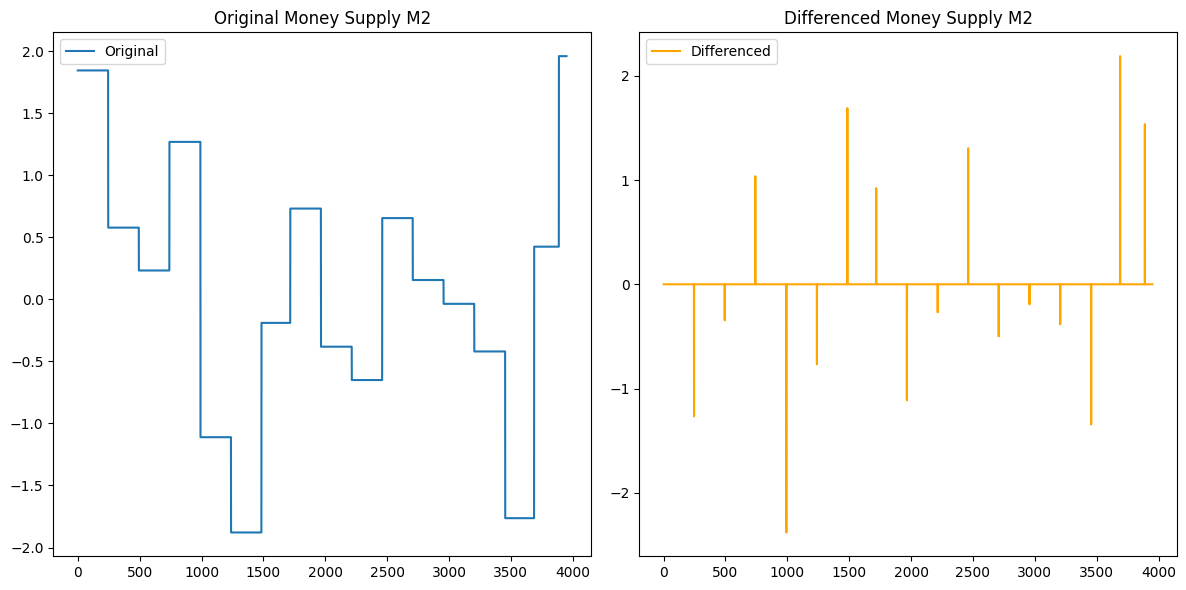


Stationarity test after differencing for Money Supply M2:
ADF Statistic for Money Supply M2_diff: -62.82516258641528
p-value: 0.0
The column 'Money Supply M2_diff' is stationary.

Checking column: Inflation Rate %
ADF Statistic for Inflation Rate %: -2.794386072777283
p-value: 0.05908016304650376
The column 'Inflation Rate %' is non-stationary.
Transforming column: Inflation Rate %


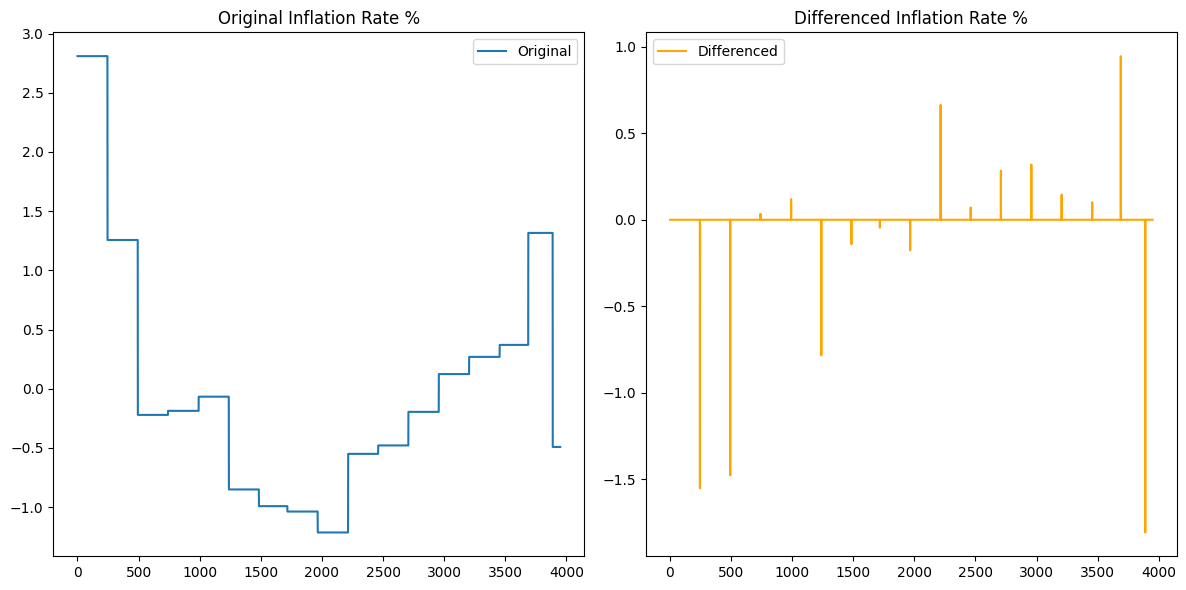


Stationarity test after differencing for Inflation Rate %:
ADF Statistic for Inflation Rate %_diff: -62.8423254375007
p-value: 0.0
The column 'Inflation Rate %_diff' is stationary.

Checking column: Annual Change
ADF Statistic for Annual Change: -3.0221491927478987
p-value: 0.03287708121234851
The column 'Annual Change' is stationary.


In [ ]:

# Step 4: Make Non-Stationary Columns Stationary and Visualize Before and After
def make_stationary(data, column_name):
    plt.figure(figsize=(12, 6))

    # Plot original data
    plt.subplot(1, 2, 1)
    plt.plot(data[column_name], label='Original')
    plt.title(f'Original {column_name}')
    plt.legend()

    # Apply differencing
    data[f'{column_name}_diff'] = data[column_name].diff()

    # Drop NA values resulting from differencing
    data_cleaned = data.dropna(subset=[f'{column_name}_diff'])

    # Plot transformed data
    plt.subplot(1, 2, 2)
    plt.plot(data_cleaned[f'{column_name}_diff'], label='Differenced', color='orange')
    plt.title(f'Differenced {column_name}')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Apply stationarity test on differenced data
    print(f"\nStationarity test after differencing for {column_name}:")
    test_stationarity(data_cleaned, f'{column_name}_diff')

# Step 5: Apply Stationarity Check and Transformation for All Numeric Columns
print("Checking stationarity for all numeric columns and transforming non-stationary columns:")
for col in all_data.select_dtypes(include=[float, int]).columns:
    print(f"\nChecking column: {col}")
    test_stationarity(all_data, col)

    # If column is non-stationary, make it stationary
    result = adfuller(all_data[col])
    if result[1] > 0.05:  # Non-stationary
        print(f"Transforming column: {col}")
        make_stationary(all_data, col)


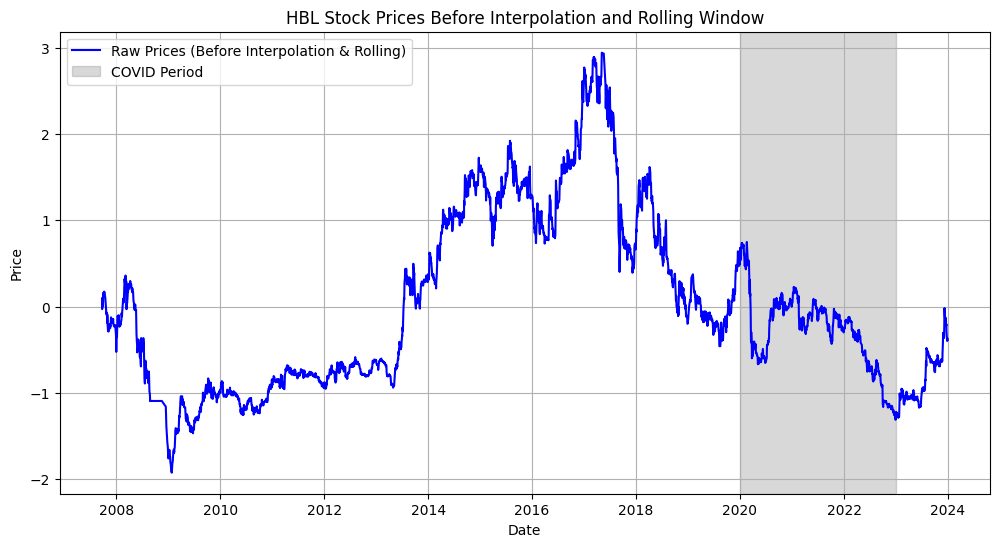

In [ ]:
import matplotlib.pyplot as plt

# Visualization 1: Raw Price Data (Before Interpolation & Rolling Window)
plt.figure(figsize=(12, 6))
plt.plot(all_data['Date'], all_data['Price'], label='Raw Prices (Before Interpolation & Rolling)', color='blue')
plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2022-12-31'), color='gray', alpha=0.3, label='COVID Period')
plt.title('HBL Stock Prices Before Interpolation and Rolling Window')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()



<ipython-input-71-a992444935bc>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['Price'] = interp_func(covid_data['Year'])
<ipython-input-71-a992444935bc>:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2007 2007 2007 ... 2023 2023 2023]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  all_data.update(covid_data)


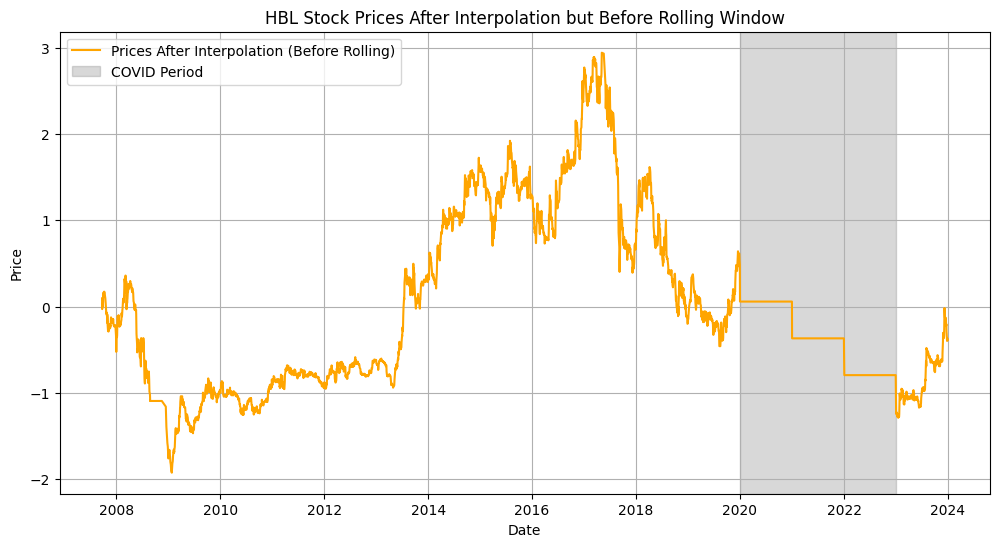

In [ ]:
# Step 1: Ensure 'Date' is in datetime format
all_data['Date'] = pd.to_datetime(all_data['Date'])

# Step 2: Sort by date (if not already sorted)
all_data = all_data.sort_values('Date')

# Step 3: Define the COVID period range
covid_years = [2020, 2021, 2022]

# Separate pre-COVID, COVID, and post-COVID data
pre_covid = all_data[all_data['Year'] < 2020]
post_covid = all_data[all_data['Year'] > 2022]
covid_data = all_data[all_data['Year'].isin(covid_years)]

# Check if pre-COVID and post-COVID data are non-empty
if not pre_covid.empty and not post_covid.empty:
    # Get the last pre-COVID price and the first post-COVID price
    start_price = pre_covid['Price'].iloc[-1]
    end_price = post_covid['Price'].iloc[0]

    # Interpolation function
    from scipy.interpolate import interp1d
    interp_func = interp1d([2019, 2023], [start_price, end_price], fill_value="extrapolate")

    # Apply interpolation to COVID period data
    covid_data['Price'] = interp_func(covid_data['Year'])

    # Update the main dataset with smoothed COVID data
    all_data.update(covid_data)
else:
    print("Pre-COVID or Post-COVID data is empty. Ensure the dataset spans both periods.")


# Visualization 2: After Interpolation but Before Rolling Window
# Assume `covid_data` has been interpolated and updated in `all_data`
plt.figure(figsize=(12, 6))
plt.plot(all_data['Date'], all_data['Price'], label='Prices After Interpolation (Before Rolling)', color='orange')
plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2022-12-31'), color='gray', alpha=0.3, label='COVID Period')
plt.title('HBL Stock Prices After Interpolation but Before Rolling Window')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


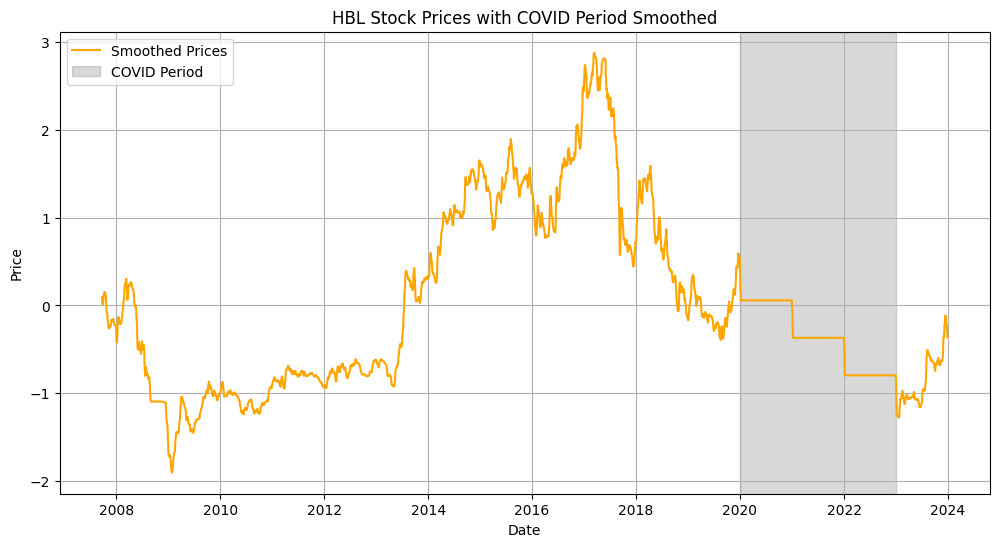

In [ ]:

# Step 4: Rolling Average for Smoothing (alternative smoothing method)
# Apply a rolling mean (window size 5 for example) to smooth out price during COVID period
all_data['Price_smooth'] = all_data['Price'].rolling(window=5, min_periods=1).mean()

# Visualization (unchanged but use smoothed prices)
plt.figure(figsize=(12, 6))
plt.plot(all_data['Date'], all_data['Price_smooth'], label='Smoothed Prices', color='orange')
plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2022-12-31'), color='gray', alpha=0.3, label='COVID Period')
plt.title('HBL Stock Prices with COVID Period Smoothed')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [ ]:
all_data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Pakistan's policy interest rate,Money Supply M2,...,Annual Change,Price_diff,Open_diff,High_diff,Low_diff,Year_diff,Pakistan's policy interest rate_diff,Money Supply M2_diff,Inflation Rate %_diff,Price_smooth
3950,2007-09-24,0.094935,0.093464,0.061564,0.126697,-0.426039,6.849232,2007,-0.389923,1.960303,...,-0.311481,0.125111,0.125256,0.123591,0.126773,0.0,0.0,0.0,0.0,0.094935
3949,2007-09-25,-0.030176,-0.031792,-0.062027,-0.000076,-0.376792,-2.532781,2007,-0.389923,1.960303,...,-0.311481,-0.045077,0.080496,-0.078153,0.081471,0.0,0.0,0.0,0.0,0.032380
3948,2007-09-26,0.014901,-0.112287,0.016126,-0.081547,13.313795,0.946909,2007,-0.389923,1.960303,...,-0.311481,0.013063,-0.129861,-0.026172,-0.110368,0.0,0.0,0.0,0.0,0.026554
3947,2007-09-27,0.001838,0.017574,0.042298,0.028821,6.333435,-0.282109,2007,-0.389923,1.960303,...,-0.311481,0.000368,0.021551,0.034169,0.053506,0.0,0.0,0.0,0.0,0.020375
3946,2007-09-28,0.001470,-0.003978,0.008129,-0.024685,4.165526,-0.019109,2007,-0.389923,1.960303,...,-0.311481,-0.048020,-0.051944,-0.034169,-0.084267,0.0,0.0,0.0,0.0,0.016594


In [ ]:
all_data.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Pakistan's policy interest rate,Money Supply M2,...,Annual Change,Price_diff,Open_diff,High_diff,Low_diff,Year_diff,Pakistan's policy interest rate_diff,Money Supply M2_diff,Inflation Rate %_diff,Price_smooth
4,2023-12-22,-0.287757,-0.215992,-0.216515,-0.270402,0.198714,-1.905627,2023,2.659343,1.845136,...,1.832276,0.110392,0.064470,0.039985,0.144484,0.0,0.0,0.0,0.0,-0.217805
3,2023-12-26,-0.398148,-0.280462,-0.256501,-0.414887,2.156495,-2.633934,2023,2.659343,1.845136,...,1.832276,-0.011039,0.101310,0.142856,0.003729,0.0,0.0,0.0,0.0,-0.267481
2,2023-12-27,-0.387109,-0.381772,-0.399357,-0.418615,0.916225,0.269179,2023,2.659343,1.845136,...,1.832276,-0.020239,-0.013999,-0.046347,-0.058726,0.0,0.0,0.0,0.0,-0.300231
1,2023-12-28,-0.366871,-0.367773,-0.353010,-0.359889,1.110978,0.496775,2023,2.659343,1.845136,...,1.832276,0.022078,0.004605,0.027081,0.012118,0.0,0.0,0.0,0.0,-0.328970
0,2023-12-29,-0.388949,-0.372378,-0.380091,-0.372007,0.162838,-0.555224,2023,2.659343,1.845136,...,1.832276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.365767


In [ ]:
# Save the final 'all_data' DataFrame as a CSV file
all_data.to_csv('smoothed_data.csv', index=False)  # Set index=False to avoid saving the DataFrame index
print("Data saved as 'smoothed_data.csv'")


Data saved as 'smoothed_data.csv'
